
# Project: Investigate a Dataset - [Tmdb-movies-Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
Tmdb-movies is dataset that contains informations about more than 10,000 movies from The Movie Database, After cleaning the data i am going to find insight according to these research questions :

#### Which genres are most popular from year to year ?
#### What is the average runtime for popular movies ?
#### Which production companies have the highest revenue over decades ?
#### What kind of properties associated with high budget movies ?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [4]:
# Loading Data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Exploring Data shape
df.shape

(10866, 21)

**The dataframe contains 10866 rows and 21 columns**

In [4]:
# Exploring Data Types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**We notice some variables are not in the right type**

### Data Cleaning

In [6]:
# Dropping unuseful columns
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','cast','director'],axis=1,inplace=True)

In [7]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [8]:
#Checking if there is any duplicated values
df.duplicated().sort_values(ascending=False)

2090      True
0        False
7249     False
7241     False
7242     False
         ...  
3624     False
3625     False
3626     False
3627     False
10865    False
Length: 10866, dtype: bool

In [9]:
#Dropping duplicates
df = df.drop_duplicates()

In [10]:
# Replacing all 0s with NaN
df = df.replace(to_replace = 0, value = np.nan)

In [11]:
#Checking the missing values
df.isna().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [12]:
# Searching for the most occuring genres
df['genres'].value_counts().sort_values(ascending = False)

Comedy                                    712
Drama                                     712
Documentary                               312
Drama|Romance                             289
Comedy|Drama                              280
                                         ... 
Drama|Action|Adventure|Crime|Thriller       1
Adventure|Fantasy|Comedy|Family|Music       1
Comedy|Mystery|Romance|Thriller             1
Comedy|Adventure|Action|Crime               1
Mystery|Science Fiction|Thriller|Drama      1
Name: genres, Length: 2039, dtype: int64

**As of above we can see Drama and Comedy are the most occuring genres**

In [15]:
# filling the missing genres with the most occuring one
occ_genre = df.genres.mode()
df['genres'] = df['genres'].fillna(occ_genre[0])

In [16]:
df.isna().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
runtime                   31
genres                     0
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [17]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [18]:
#Replacing invalid budget data with the mean
bud_mean = df.budget.mean()
df['budget'] = df['budget'].replace(to_replace = 0, value = bud_mean)

In [19]:
#Replacing invalid revenue data with the mean
rev_mean = df.revenue.mean()
df['revenue'] = df['revenue'].replace(to_replace = 0, value = rev_mean)

In [20]:
#Replacing invalid runtime data with the mean
rnt_mean = df.runtime.mean()
df['runtime'] = df['runtime'].replace(to_replace = 0, value = rnt_mean)

In [21]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,4.196096e+07,1.988557e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
# Fixing the 2 digits problem in the release date columns so the conversion goes right
df['release_date'] = df.apply(lambda col: f"{col['release_date'][:-2]}{col['release_year']}",axis=1)
df['release_date']

0          6/9/2015
1         5/13/2015
2         3/18/2015
3        12/15/2015
4          4/1/2015
            ...    
10861     6/15/1966
10862    12/21/1966
10863      1/1/1966
10864     11/2/1966
10865    11/15/1966
Name: release_date, Length: 10865, dtype: object

In [23]:
#Converting the release date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                5169 non-null   float64       
 2   revenue               4849 non-null   float64       
 3   original_title        10865 non-null  object        
 4   runtime               10834 non-null  float64       
 5   genres                10865 non-null  object        
 6   production_companies  9835 non-null   object        
 7   release_date          10865 non-null  datetime64[ns]
 8   vote_count            10865 non-null  int64         
 9   vote_average          10865 non-null  float64       
 10  release_year          10865 non-null  int64         
 11  budget_adj            5169 non-null   float64       
 12  revenue_adj           4849 non-null   float64       
dtypes: datetime64[ns

**We notice that revenue and budget columns have more than 50% missing values**

<a id='eda'></a>
## Exploratory Data Analysis

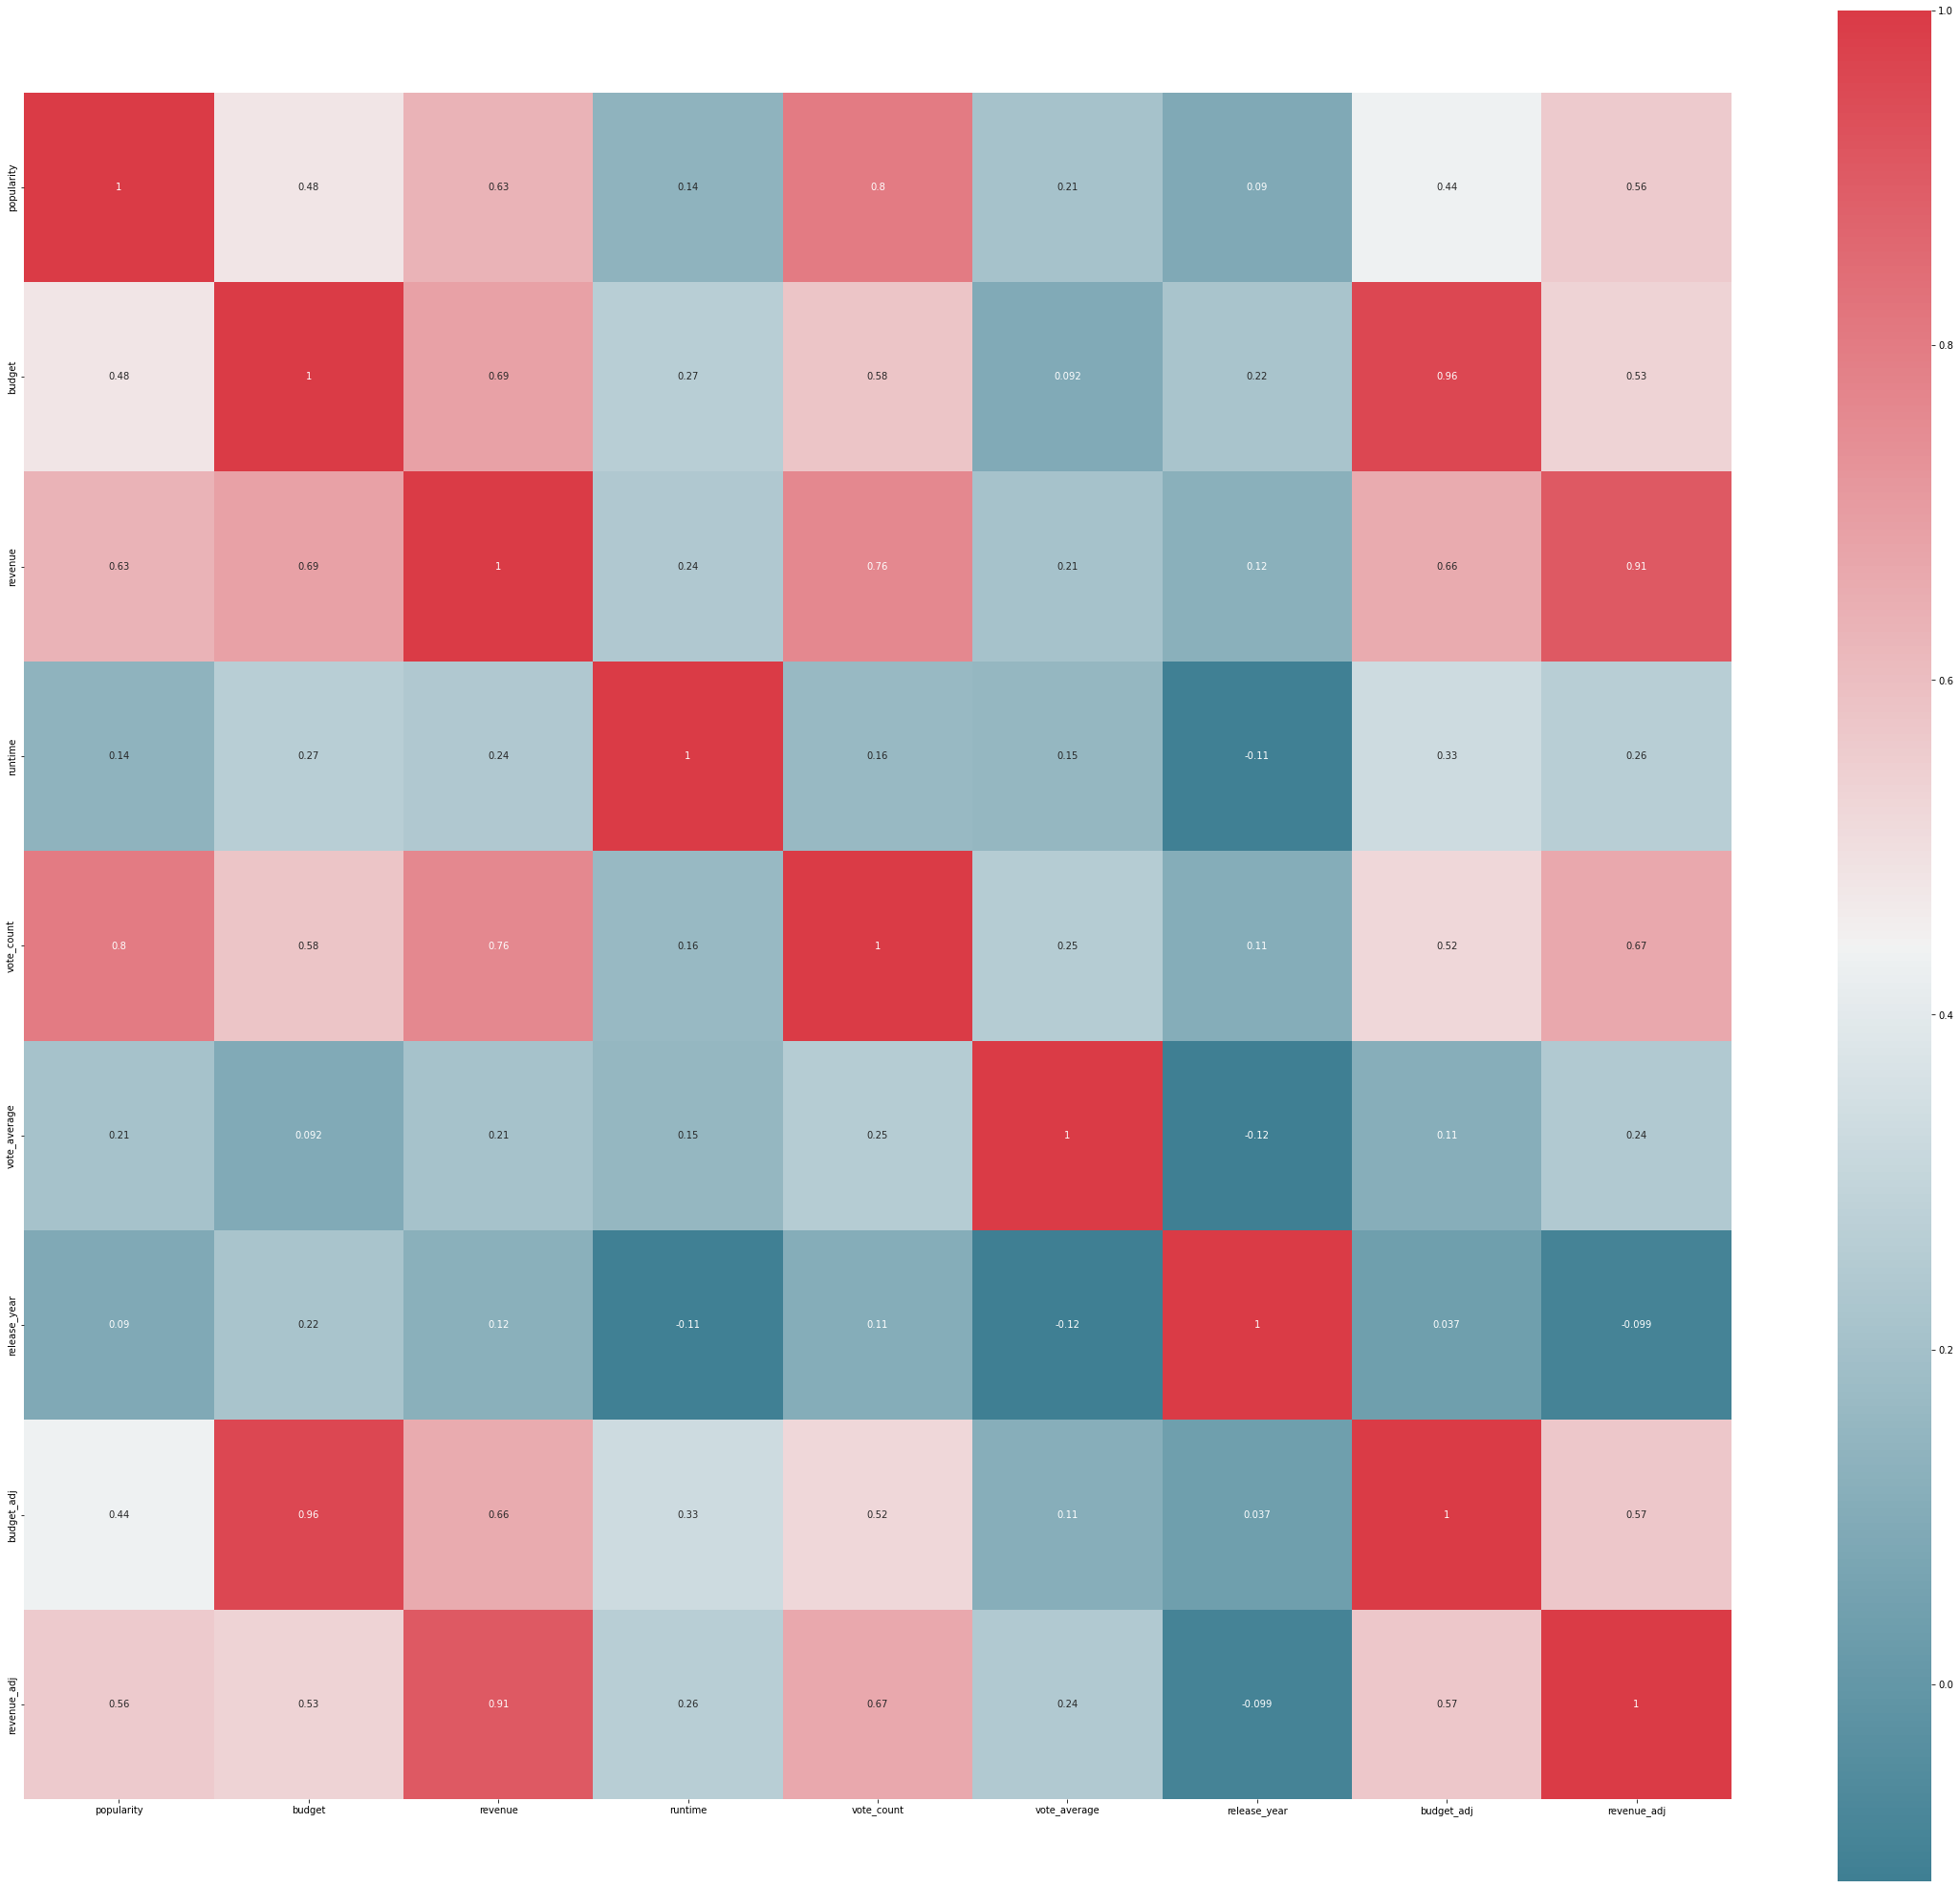

In [25]:
# Calculating the correlation between all features to find out which ones have a strong correlation (double clic to zoom)
def plot_correlation_map ():
    corr = df.corr ()
    s, ax = plt.subplots (figsize = (40, 40))
    cmap = sns.diverging_palette (220, 10, as_cmap = True)
    s = sns.heatmap (corr, cmap = cmap,square = True, cbar_kws = {'shrink': .9},ax = ax, annot = True, annot_kws = {'fontsize': 10})

plot_correlation_map()

**We notice some variables have strong correlation between each others while others don't**

### Research Question 1 : What is the average runtime for popular movies ?

In [26]:
#Extracting the most popular movies
high_pop_qt = df.popularity.quantile(.75)
high_pop = df[df['popularity'] > high_pop_qt]
high_pop_rt = high_pop['runtime']

In [27]:
high_pop_rt.describe()

count    2715.000000
mean      108.427993
std        23.806645
min         3.000000
25%        95.000000
50%       105.000000
75%       119.000000
max       540.000000
Name: runtime, dtype: float64

Text(0.5, 1.0, 'Runtime Distribution')

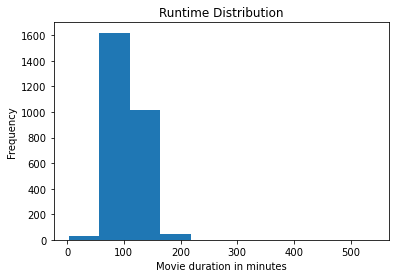

In [28]:
# Drawing the histogram of high popularity movies's runtime
high_pop_rt.hist(grid =False)
plt.xlabel('Movie duration in minutes')
plt.ylabel('Frequency')
plt.title('Runtime Distribution')
# Checking movies runtime distribution

**Most movies have a duration rate between 70 and 120 minutes**

In [29]:
# More than 50% of movies lasts more than 2hours
high_pop_rt.quantile(.75)

119.0

### Research Question 2 :  Which genres are most popular from year to year ?

In [30]:
# Creating a new DataFrame and assigning useful columns 
pop_gen = df[['popularity','genres','release_year']]
pop_gen

,popularity,genres,release_year
0,32.985763,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,Adventure|Science Fiction|Thriller,2015
3,11.173104,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,Action|Crime|Thriller,2015
...,...,...,...
10861,0.080598,Documentary,1966
10862,0.065543,Action|Adventure|Drama,1966
10863,0.065141,Mystery|Comedy,1966
10864,0.064317,Action|Comedy,1966


In [31]:
# We have to split concatenated genres into rows for better analysis
import itertools
def concat(ch):
    return list(itertools.chain.from_iterable(ch.str.split('|')))

lengths = pop_gen['genres'].str.split('|').map(len)
# Creating a new dataframe with splitted rows
pop_gen = pd.DataFrame({'release_year' : np.repeat(pop_gen['release_year'], lengths),
                                                   'genres' : concat(pop_gen['genres']),
                                                   'popularity' : np.repeat(pop_gen['popularity'], lengths)})

**We need to select the most popular genre for each year**

In [32]:
# Grouping each genre and its release year with their corresponding population mean without setting them as an index
pop_gen = pop_gen.groupby(['release_year','genres'],as_index = False).mean()
pop_gen

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305
...,...,...,...
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511


In [33]:
# Selecting the most popular genre for each year
high_pop = pop_gen.groupby('release_year', as_index= False).apply(lambda x : x.loc[x['popularity'
                                                                    ] == x['popularity'].max()])

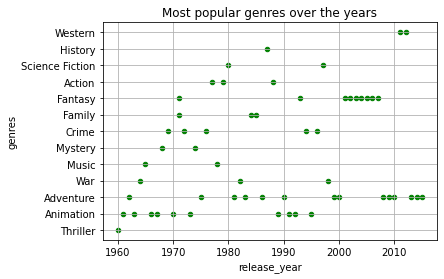

In [34]:
# Plotting the most popular genres over the years
high_pop.plot(grid = True ,kind = 'scatter', x = 'release_year', y = 'genres', color = 'green', title= 'Most popular genres over the years')
plt.show()
# We want to see the most popular genre each year

**We observe that each year the popular genres varies from one to another except few years :> Fantasy is the mot popular genres from 2000 to 2008**

In [35]:
high_pop['genres'].mode()

0    Adventure
Name: genres, dtype: object

### Research Question 3 :  What kind of properties associated with high budget movies ?

In [36]:
# Exploring the budget column
df['budget'].describe()

count    5.169000e+03
mean     3.073958e+07
std      3.890441e+07
min      1.000000e+00
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

Text(0.5, 1.0, 'Budget Distribution')

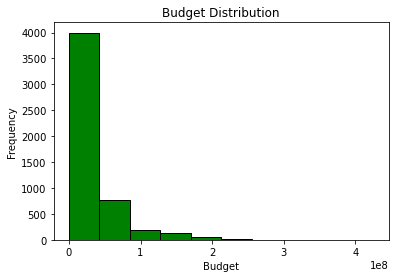

In [37]:
# Drawing the histogram for the budget column
# We want to see the frequency of movies with low / high budget
df['budget'].hist(grid=False ,color='green', edgecolor='black')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Budget Distribution')

**Right skewed histogram :> As we can see movies with low budget is less than those with a high budget**

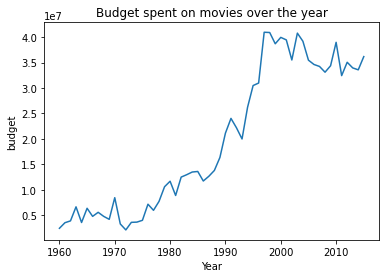

In [38]:
# Plotting the budget amount spent over the years
budget_per_year = df.groupby('release_year')['budget'].mean()
plt.plot(budget_per_year)
plt.title('Budget spent on movies over the year')
plt.xlabel('Year')
plt.ylabel('budget')
plt.show()

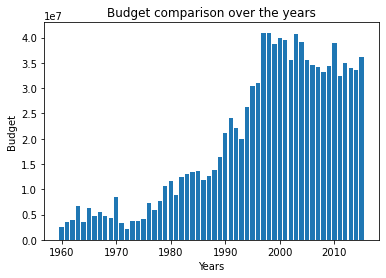

In [39]:
# Plotting the comparison between budgets over the years
plt.bar(budget_per_year.index, budget_per_year.values, width = 0.8)
plt.title('Budget comparison over the years')
plt.xlabel('Years')
plt.ylabel('Budget')
plt.show()

**There is an obvious increase in the budget rate, The peak is located in the end of 1990s and in the beginning of the 2000s**

In [40]:
#Extracting movies with high budget
mean = df['budget'].mean()
high_budget = df[df['budget'] > mean]
high_budget.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1610.000000,1.610000e+03,1.492000e+03,1610.000000,1610.000000,1610.000000,1610.000000,1.610000e+03,1.492000e+03
mean,1.633981,7.340075e+07,2.052036e+08,114.604348,848.940994,6.094099,2004.285093,8.301328e+07,2.293496e+08
std,1.940911,4.513349e+07,2.381832e+08,24.265403,1157.200985,0.765904,7.242327,4.563317e+07,2.547410e+08
min,0.017498,3.100000e+07,1.440000e+02,28.000000,10.000000,2.200000,1963.000000,2.851999e+07,1.557604e+02
25%,0.661252,4.000000e+07,5.865208e+07,99.000000,167.000000,5.600000,1999.000000,5.024535e+07,6.689895e+07
50%,1.110613,6.000000e+07,1.287838e+08,111.000000,406.000000,6.100000,2005.000000,7.033395e+07,1.485517e+08
75%,1.906933,8.500000e+07,2.553180e+08,126.000000,1025.750000,6.600000,2010.000000,1.013034e+08,2.947645e+08
max,32.985763,4.250000e+08,2.781506e+09,540.000000,9767.000000,8.100000,2015.000000,4.250000e+08,2.827124e+09


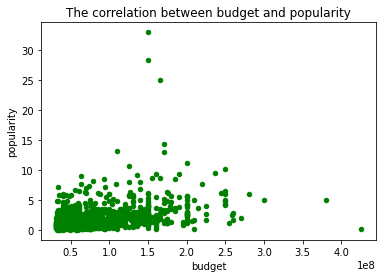

In [41]:
# Plotting the correlation between budget and popularity
high_budget.plot(kind='scatter',x='budget', y='popularity', color='green')
plt.title('The correlation between budget and popularity')
plt.show()

**We can notice a slightly strong correlation between Budget and popularity :> Movies wih low budget tend to be less popular**

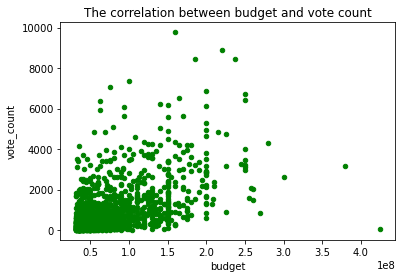

In [42]:
# Plotting the correlation between budget and vote count
high_budget.plot(kind='scatter',x='budget', y='vote_count', color='green')
plt.title('The correlation between budget and vote count')
plt.show()

In [43]:
# We can notice a strong correlation between Budget and vote_count

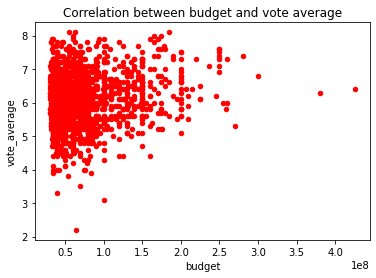

In [44]:
# Plotting the coorelation between budget and vote average
high_budget.plot(kind='scatter',x='budget', y='vote_average', color='red')
plt.title('Correlation between budget and vote average')
plt.show()

**We can notice a weak correlation between Budget and vote average** 

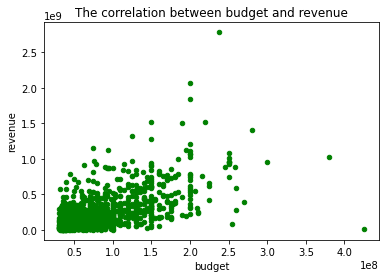

In [45]:
#Plotting the correlation between budget and revenue
high_budget.plot(kind='scatter',x='budget', y='revenue', color='green')
plt.title('The correlation between budget and revenue')
plt.show()

**We notice a strong correlation between budget and revenue** :> **Movies with lower budget have less revenue**

### Research Question 4 : Which production companies have the highest revenue over decades ?

In [46]:
# Creating a new dataframe
prod_cp = df[['production_companies', 'popularity', 'revenue','budget','release_year']]

In [47]:
# Converting production companies column to str to easily manipulate data
prod = prod_cp['production_companies'].astype(str)
# Dropping the column to replace it with the new one
prod_cp = prod_cp.drop('production_companies', axis=1)

In [48]:
# Assigning the new converted column to the dataframe
prod_cp['production_companies'] = prod

In [49]:
prod_cp

,popularity,revenue,budget,release_year,production_companies
0,32.985763,1.513529e+09,150000000.0,2015,Universal Studios|Amblin Entertainment|Legenda...
1,28.419936,3.784364e+08,150000000.0,2015,Village Roadshow Pictures|Kennedy Miller Produ...
2,13.112507,2.952382e+08,110000000.0,2015,Summit Entertainment|Mandeville Films|Red Wago...
3,11.173104,2.068178e+09,200000000.0,2015,Lucasfilm|Truenorth Productions|Bad Robot
4,9.335014,1.506249e+09,190000000.0,2015,Universal Pictures|Original Film|Media Rights ...
...,...,...,...,...,...
10861,0.080598,NaN,NaN,1966,Bruce Brown Films
10862,0.065543,NaN,NaN,1966,Cherokee Productions|Joel Productions|Douglas ...
10863,0.065141,NaN,NaN,1966,Mosfilm
10864,0.064317,NaN,NaN,1966,Benedict Pictures Corp.


In [50]:
# Splitting concatenated names into multiple rows
lengths1 = prod_cp['production_companies'].str.split('|').map(len)
# Creating a new dataframe with the new splitted rows
prod_cp = pd.DataFrame({'production_companies' : concat(prod_cp['production_companies']),
                                                   'popularity' : np.repeat(prod_cp['popularity'], lengths1),
                                                   'revenue' : np.repeat(prod_cp['revenue'], lengths1), 'budget' : np.repeat(prod_cp['budget'], lengths1), 'release_year' : np.repeat(prod_cp['release_year'], lengths1)})

In [51]:
# Creating a list of decades to summerize all the years
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

In [52]:
# Assigning each year to it's corresponding decade
prod_cp['decade'] = pd.cut(prod_cp['release_year'], bin_edges, labels=bin_names)
prod_cp

,production_companies,popularity,revenue,budget,release_year,decade
0,Universal Studios,32.985763,1.513529e+09,150000000.0,2015,2010s
0,Amblin Entertainment,32.985763,1.513529e+09,150000000.0,2015,2010s
0,Legendary Pictures,32.985763,1.513529e+09,150000000.0,2015,2010s
0,Fuji Television Network,32.985763,1.513529e+09,150000000.0,2015,2010s
0,Dentsu,32.985763,1.513529e+09,150000000.0,2015,2010s
...,...,...,...,...,...,...
10862,Joel Productions,0.065543,NaN,NaN,1966,1960s
10862,Douglas & Lewis Productions,0.065543,NaN,NaN,1966,1960s
10863,Mosfilm,0.065141,NaN,NaN,1966,1960s
10864,Benedict Pictures Corp.,0.064317,NaN,NaN,1966,1960s


In [53]:
# Dropping the release year column since we don't need it
prod_cp.drop('release_year', axis=1,inplace=True)

In [54]:
# Getting all features mean for each production company over years
prod_cp = prod_cp.groupby(['decade','production_companies'], as_index = False).mean().sort_values('decade',ascending=True)

In [55]:
prod_cp

,decade,production_companies,popularity,revenue,budget
0,1960s,"""DIA"" Productions GmbH & Co. KG",NaN,NaN,NaN
5260,1960s,Pangaea,NaN,NaN,NaN
5259,1960s,Pandora Pictures,NaN,NaN,NaN
5258,1960s,Pandora Filmproduktion,NaN,NaN,NaN
5257,1960s,Pandora Film,NaN,NaN,NaN
...,...,...,...,...,...
42019,2010s,First Independent Films,NaN,NaN,NaN
42018,2010s,First Generation Films,0.928584,15611137.5,14000000.0
42017,2010s,First Foot Films,NaN,NaN,NaN
42015,2010s,First Films,NaN,NaN,NaN


In [56]:
# Getting the companies with the highest revenue for each decade
high_rev = prod_cp.groupby('decade', as_index= False).apply(lambda x : x.loc[x['revenue'
                                                                    ] == x['revenue'].max()])

In [57]:
high_rev

,,decade,production_companies,popularity,revenue,budget
0,7567,1960s,Walt Disney Pictures,0.855116,2.058436e+08,4.000000e+06
1,12067,1970s,Lucasfilm,6.070151,4.762660e+08,9.925667e+06
2,22852,1980s,Tig Productions,1.695911,4.242088e+08,2.200000e+07
3,27827,1990s,Lucasfilm,3.526029,9.243176e+08,1.150000e+08
4,35589,2000s,Lightstorm Entertainment,4.988259,1.405754e+09,1.420000e+08
5,46641,2010s,Truenorth Productions,11.173104,2.068178e+09,2.000000e+08


**As we can see Lucasfilm is the company with the highest revenue for two decade while the Lightstorm Entertainement is the highest over all in terms of revenue amount**

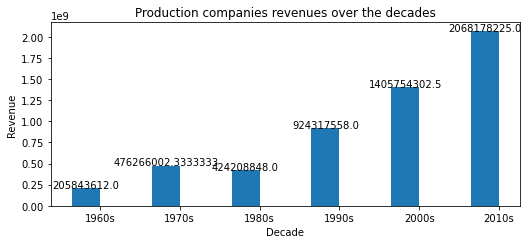

In [58]:
# Plotting the highest revenue for each decade
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
x = np.arange(len(high_rev.decade)) # the label locations
width = 0.35
fig, ax = plt.subplots()
ax.set_ylabel('Revenue')
ax.set_xlabel('Decade')
ax.set_title('Production companies revenues over the decades')
ax.set_xticks(x)
ax.set_xticklabels(high_rev.decade)
pps = ax.bar(x - width / 2, high_rev.revenue, width, label='revenue')
for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height+.10,s="{}".format(height),ha='center')
plt.show()

**The revenue is enormously increasing each decade**

<AxesSubplot:xlabel='budget'>

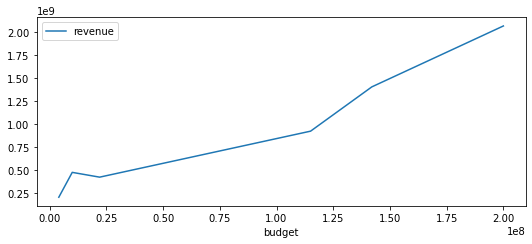

In [59]:
high_rev.plot(kind='line', x='budget', y='revenue')

**We notice that each decade a new production company rise except Lucasfilm which appeared twice in the 1970s and the 1990s**

<a id='conclusions'></a>
## Conclusions

## According to all the analysis above, We can conclude that

   ### - 75% of high popularity movies runtime is above 119 minutes, People tend to like 2 hours long movies.
   
   ### - Budget have extremely increased over the years, The lowest budget located in the 1970s while in the last of the 1990s we can find the peak, although it shows a slight decrease in the 2010s.
   
   ### - Based on the correlation map and plots, budgets corresponding to high budget movies tends to have a strong correlation with average count, popularity and revenue, While it shows a weak one with average voting.
   
   ### - Genres with high popularity have changed over the years with an overall analysis, It shows some stabilty in couple years, Mentionning 'Animation', 'Fantasy' and 'Adventure.   
   
   ### - Lucasfilm movies occupies the top in the 1970s and the 1990s decades in terms of revenue.
   
   ### -Truenorth Production have the highest revenue rate of all decades.
   

   
   ### - Production companies need to invest more in  Adventure - Fantasy - and Animation movies, taking into account it's duration (As mentionned above)
   
   ### - The top 6 production companies need to make a partnership in order to make popular successful movies with high revenue.

## Limitation
There are so many data that have been cleaned in this report which is considered as anomalies since they contains a lot of 0s, NaN, and duplicates. The amount of data cleaned (replaced by it's mean) is over 6000 samples for each budget and revenue columns.
This اhuge change affects the credibility of results and it does not represent the population.

# References
https://www.geeksforgeeks.org/change-plot-size-in-matplotlib-python/#:~:text=Here%20are%20various%20ways%20to%20change%20the%20default,plt.%20x%20%3D%20%5B1%2C%202%2C%203%2C%204%2C%205%5D

https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://stackoverflow.com/questions/67539180/how-do-i-increase-bar-chart-size-with-matplotlib
https://www.tutorialkart.com/matplotlib-tutorial/matplotlib-pyplot-bar-plot-width/
https://pythonguides.com/matplotlib-scatter-plot-color/

https://www.tutorialspoint.com/how-to-write-text-above-the-bars-on-a-bar-plot-python-matplotlib